<a href="https://colab.research.google.com/github/thathsara98/Network-IDS/blob/main/Network_Intrusion_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### run this cell only when using google cloab ###
# mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls

gdrive	sample_data


In [3]:
# importing all the necessary packages
import tqdm
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from mpl_toolkits import mplot3d
from tensorflow import keras
from keras.layers import Input, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Sequential
from keras.models import Model
import keras
from keras import backend as K
from scipy.spatial.distance import euclidean
import random
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay


In [4]:
# checking if tensorflow version is 2.x
tf.__version__

'2.13.0'

In [5]:
# checking if gpu is available
print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


In [7]:
# setting paths to import train and test data files.
TRAIN_DATA_PATH = r'/content/gdrive/MyDrive/Colab Notebooks/kdd_train.csv' #pur r to read the file which is in another directory
COLUMN_NAMES_PATH = r'/content/gdrive/MyDrive/Colab Notebooks/columns_names.txt'
TEST_DATA_PATH = r'/content/gdrive/MyDrive/Colab Notebooks/kdd_test.csv' #corrected data
PROD_DATA_PATH = r'/content/gdrive/MyDrive/Colab Notebooks/kdd_production.csv'

In [8]:
# reading the training data file
df = pd.read_csv(TRAIN_DATA_PATH, header=None)


In [9]:
# reading the file containing feature names
with open(COLUMN_NAMES_PATH, 'r') as txt_file:
    col_names = txt_file.readlines()
col_names

['duration: continuous.\n',
 'protocol_type: symbolic.\n',
 'service: symbolic.\n',
 'flag: symbolic.\n',
 'src_bytes: continuous.\n',
 'dst_bytes: continuous.\n',
 'land: symbolic.\n',
 'wrong_fragment: continuous.\n',
 'urgent: continuous.\n',
 'hot: continuous.\n',
 'num_failed_logins: continuous.\n',
 'logged_in: symbolic.\n',
 'num_compromised: continuous.\n',
 'root_shell: continuous.\n',
 'su_attempted: continuous.\n',
 'num_root: continuous.\n',
 'num_file_creations: continuous.\n',
 'num_shells: continuous.\n',
 'num_access_files: continuous.\n',
 'num_outbound_cmds: continuous.\n',
 'is_host_login: symbolic.\n',
 'is_guest_login: symbolic.\n',
 'count: continuous.\n',
 'srv_count: continuous.\n',
 'serror_rate: continuous.\n',
 'srv_serror_rate: continuous.\n',
 'rerror_rate: continuous.\n',
 'srv_rerror_rate: continuous.\n',
 'same_srv_rate: continuous.\n',
 'diff_srv_rate: continuous.\n',
 'srv_diff_host_rate: continuous.\n',
 'dst_host_count: continuous.\n',
 'dst_host_srv

In [11]:
col_names_cleaned = [i.split(':')[0] for i in col_names]
# adding an extra column for the indicator
col_names_cleaned.extend(['result'])
# extracting only continous features

continous_col_indices = [col.split(':')[0] for i, col in enumerate(col_names) if col.split(':')[1]==' continuous\n' or col.split(':')[1]==' continuous']


In [12]:
# Set the column names of the DataFrame
df.columns = col_names_cleaned

# Now df should have 42 columns matching col_names_cleaned
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [13]:
print('different types of services: {}'.format(df['service'].unique()))


different types of services: ['http' 'smtp' 'domain_u' 'auth' 'finger' 'telnet' 'eco_i' 'ftp' 'ntp_u'
 'ecr_i' 'other' 'urp_i' 'private' 'pop_3' 'ftp_data' 'netstat' 'daytime'
 'ssh' 'echo' 'time' 'name' 'whois' 'domain' 'mtp' 'gopher' 'remote_job'
 'rje' 'ctf' 'supdup' 'link' 'systat' 'discard' 'X11' 'shell' 'login'
 'imap4' 'nntp' 'uucp' 'pm_dump' 'IRC' 'Z39_50' 'netbios_dgm' 'ldap'
 'sunrpc' 'courier' 'exec' 'bgp' 'csnet_ns' 'http_443' 'klogin' 'printer'
 'netbios_ssn' 'pop_2' 'nnsp' 'efs' 'hostnames' 'uucp_path' 'sql_net'
 'vmnet' 'iso_tsap' 'netbios_ns' 'kshell' 'urh_i' 'http_2784' 'harvest'
 'aol' 'tftp_u' 'http_8001' 'tim_i' 'red_i']


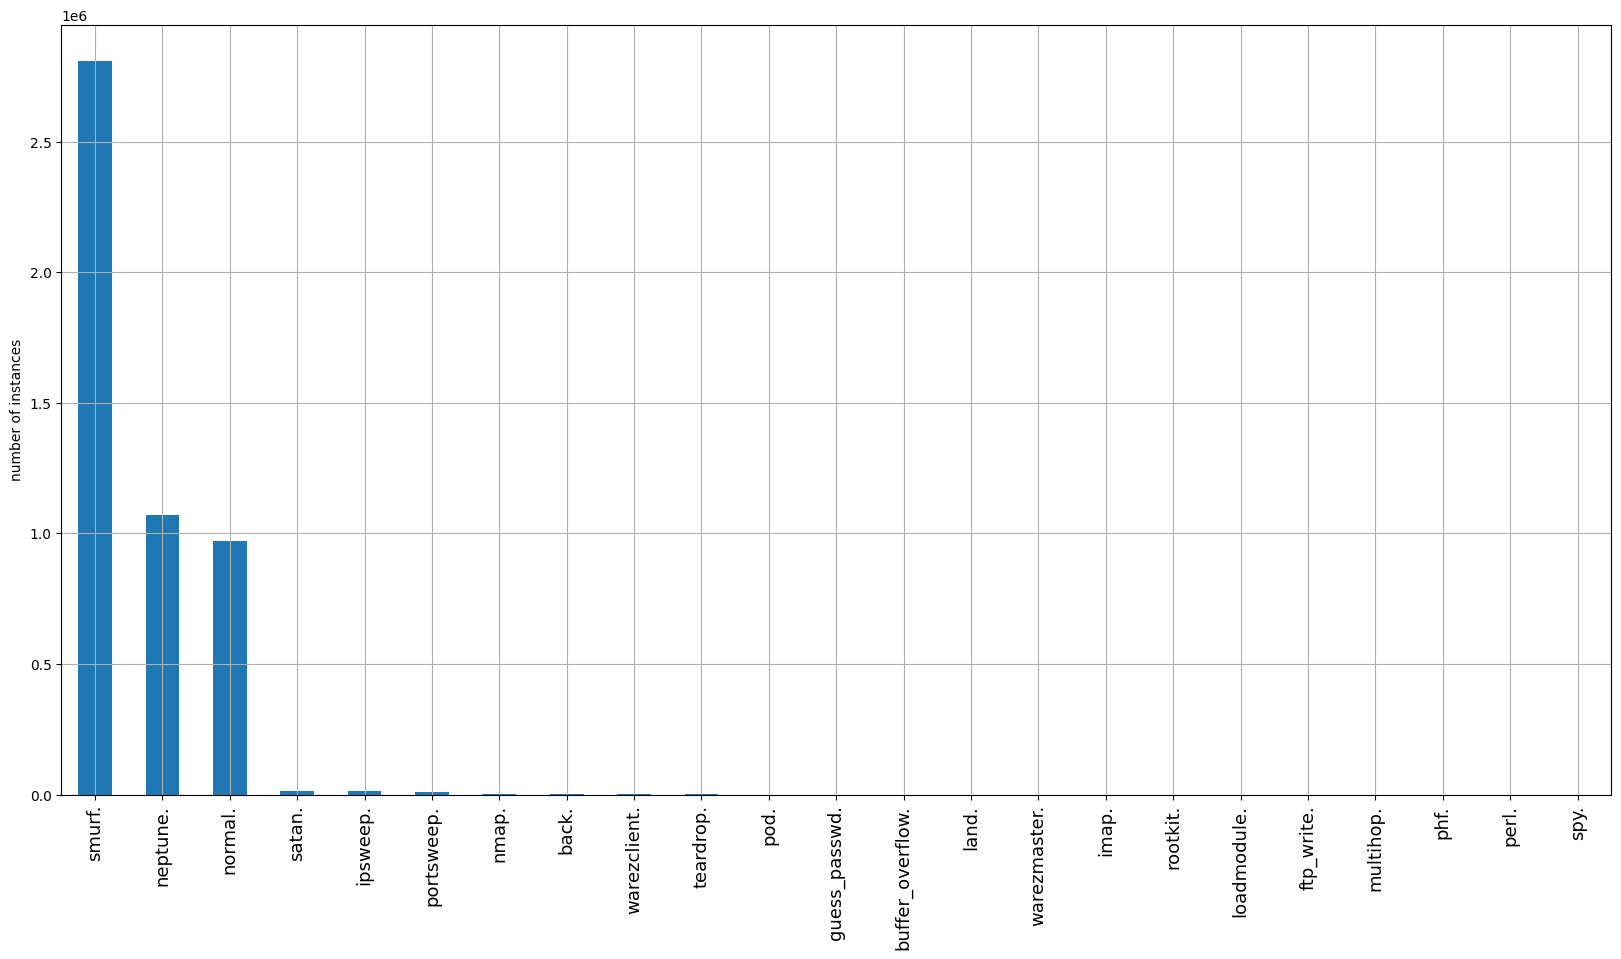

In [14]:
pd.value_counts(df['result']).plot(kind='bar', figsize=(20, 10))
plt.ylabel('number of instances')
plt.xticks(fontsize=13)
plt.grid()
plt.show()

In [15]:
# extracting only the rows which have http service.
df_http = df[(df['service']=='http')]

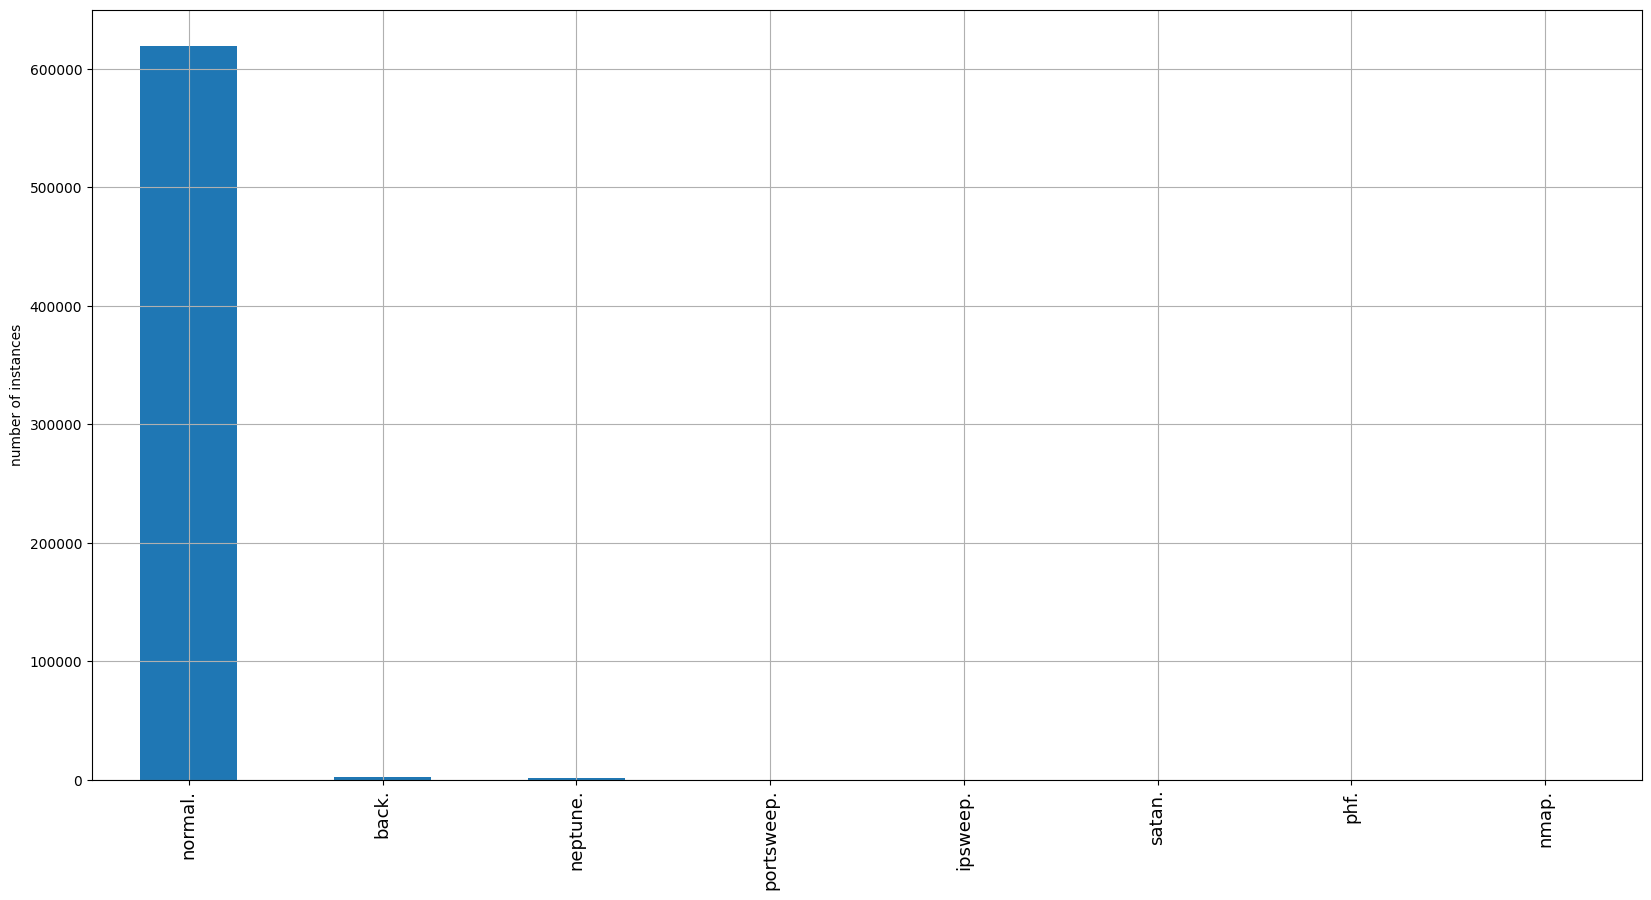

In [16]:
pd.value_counts(df_http['result']).plot(kind='bar', figsize=(20, 10))
plt.ylabel('number of instances')
plt.xticks(fontsize=13)
plt.grid()
plt.show()

In [17]:
normal_instances = df_http[df_http['result']=='normal.'].shape[0]
anomalous_instances = df_http[df_http['result']!='normal.'].shape[0]
print('percentage of anomalies = {}'.format(100*anomalous_instances/normal_instances))

percentage of anomalies = 0.6534247858802092


In [18]:
# extracting only the instances belonging to the normal class
df_http_normal = df_http[df_http['result']=='normal.']
df_http_normal.shape

(619046, 42)

In [19]:
# dropping catrgorical columns
df_http_normal.drop(['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login', 'result'], axis=1, inplace=True)
# dropping columns with no std deviation
df_http_normal.drop(['wrong_fragment', 'urgent', 'num_failed_logins', 'su_attempted', 'num_file_creations', 'num_outbound_cmds'], axis=1, inplace=True)

<ipython-input-19-31fb29fd97f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_http_normal.drop(['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login', 'result'], axis=1, inplace=True)
<ipython-input-19-31fb29fd97f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_http_normal.drop(['wrong_fragment', 'urgent', 'num_failed_logins', 'su_attempted', 'num_file_creations', 'num_outbound_cmds'], axis=1, inplace=True)


In [20]:
df_http_normal.describe()

,duration,src_bytes,dst_bytes,hot,num_compromised,root_shell,num_root,num_shells,num_access_files,count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,619046.000000,619046.000000,6.190460e+05,619046.000000,619046.000000,619046.000000,619046.000000,619046.000000,619046.000000,619046.000000,...,619046.000000,619046.000000,619046.000000,619046.000000,619046.000000,619046.000000,619046.000000,619046.000000,619046.000000,619046.000000
mean,0.561887,238.164408,4.099786e+03,0.003489,0.000244,0.000312,0.000013,0.000010,0.005412,8.967949,...,127.590137,244.759520,0.997517,0.000701,0.074793,0.031858,0.001152,0.000697,0.087653,0.086727
std,13.927250,126.545153,2.371340e+04,0.081921,0.037207,0.017654,0.003595,0.003113,0.073364,9.252731,...,105.902328,39.788676,0.020105,0.006409,0.185882,0.050566,0.013363,0.003392,0.274847,0.268584
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,210.000000,4.580000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,21.000000,255.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,240.000000,1.425000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,...,96.000000,255.000000,1.000000,0.000000,0.010000,0.020000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,302.000000,3.727000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,...,255.000000,255.000000,1.000000,0.000000,0.050000,0.040000,0.000000,0.000000,0.000000,0.000000
max,3289.000000,54540.000000,1.173059e+07,21.000000,21.000000,1.000000,1.000000,1.000000,1.000000,511.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000


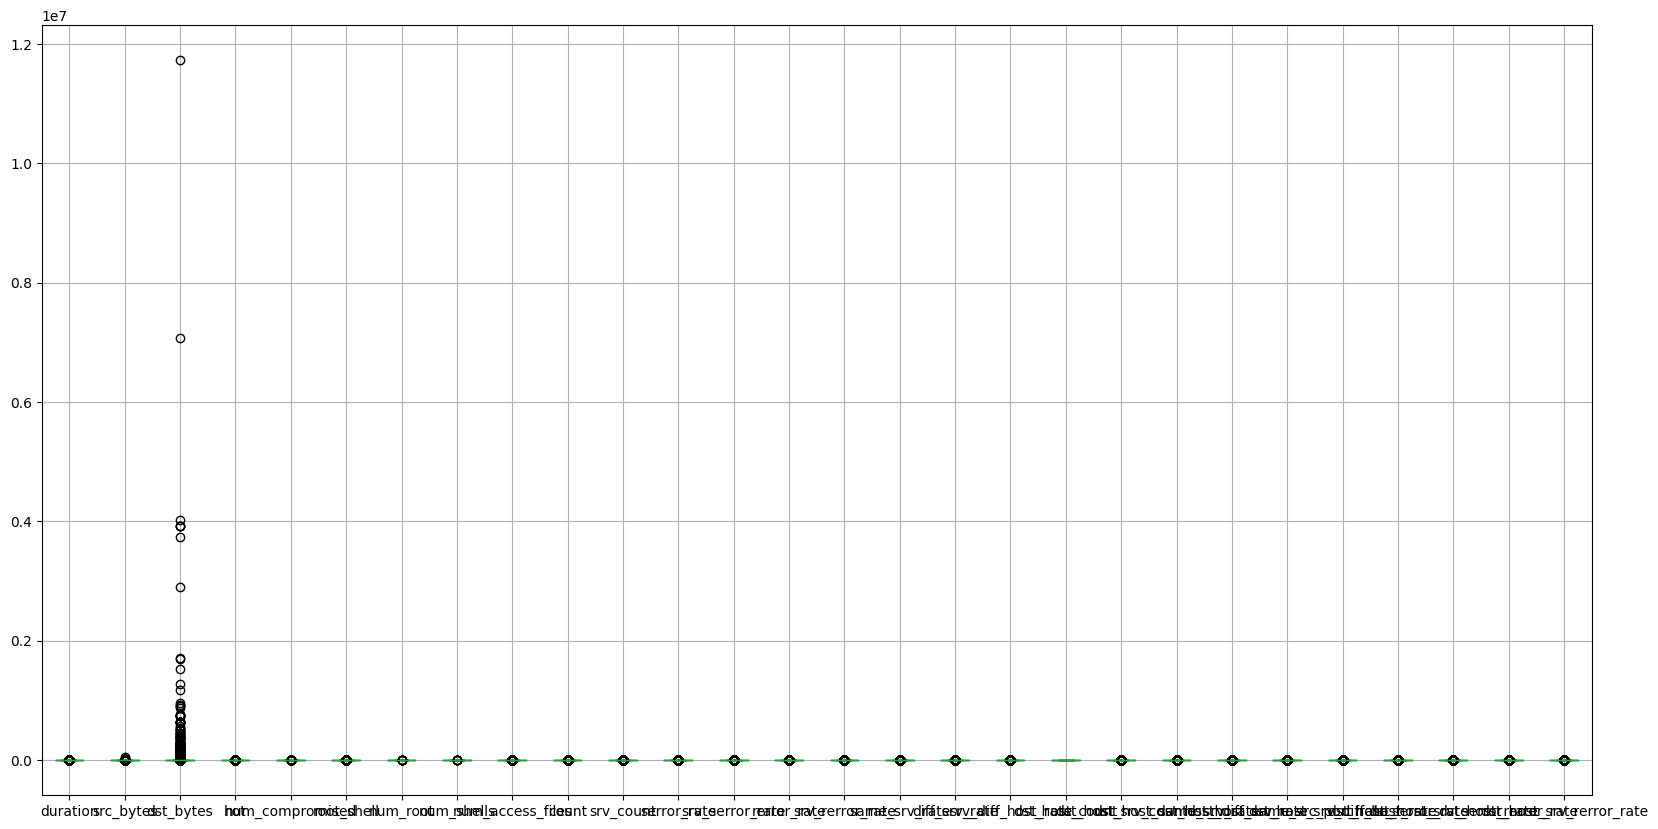

In [21]:
df_http_normal.boxplot(figsize=(20, 10))
plt.show()

In [22]:
# scaling the data using standard scaler
scaler = StandardScaler()
df_http_normal = pd.DataFrame(scaler.fit_transform(df_http_normal), columns=df_http_normal.columns)

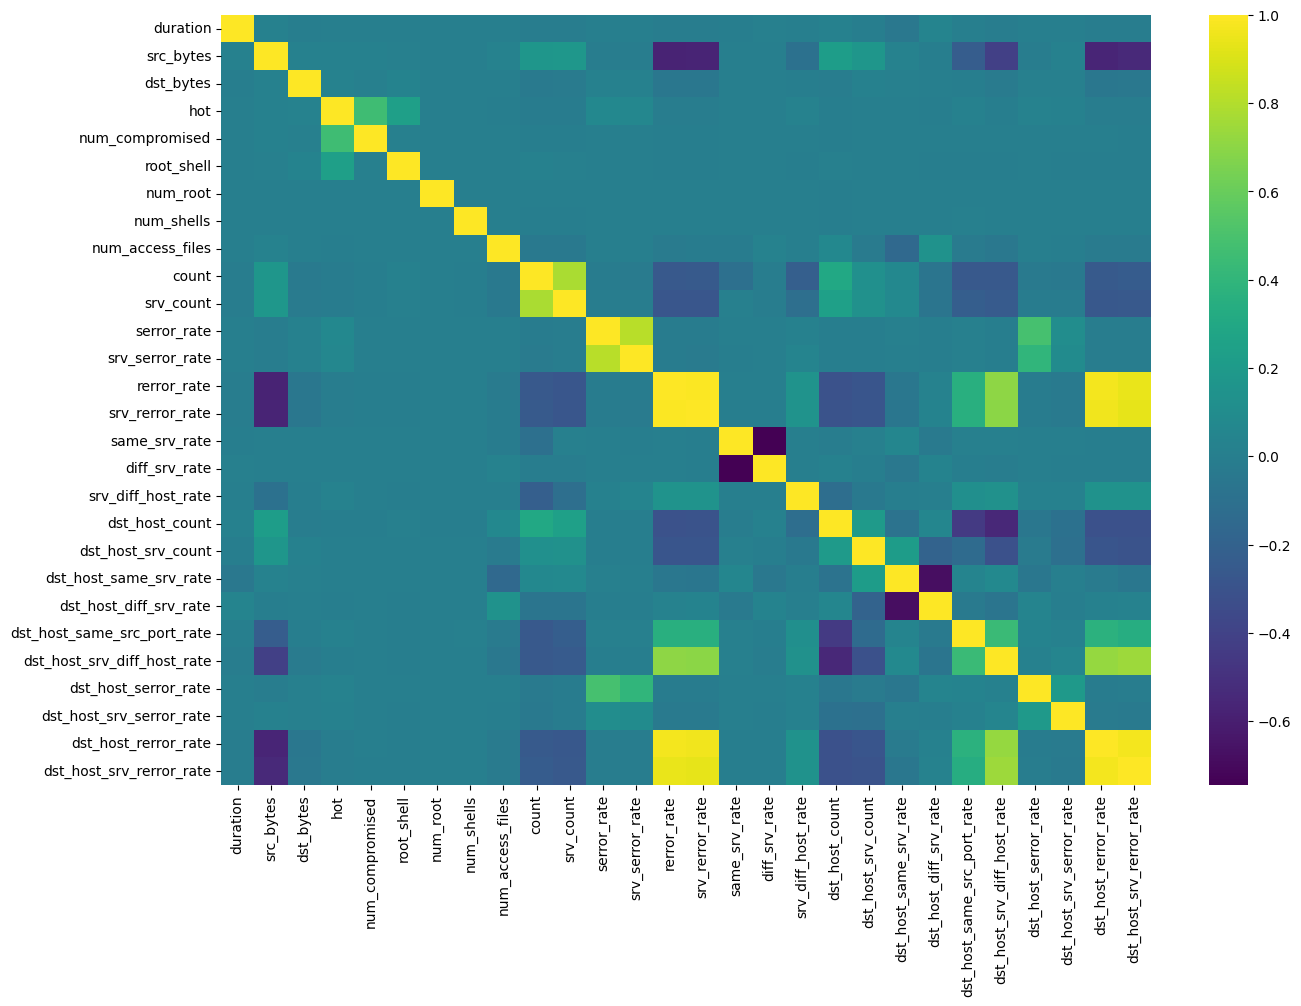

In [23]:
# examining the correlation between different features
plt.figure(figsize=(15, 10))
sns.heatmap(df_http_normal.corr(), cmap='viridis')
plt.show()

In [25]:
# reducing the dimensionality of the data using PCA and covering 80% of the variance in the original data
pca = PCA(n_components=0.8)
pca.fit(df_http_normal)

PCA(n_components=0.8)

In [27]:
pca_cols = ['PCA_'+ str(i) for i in range(pca.n_components_)]
df_pca = pd.DataFrame(pca.transform(df_http_normal), columns=pca_cols)

In [28]:
df_pca.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13
0,-1.798859,3.088944,29.703657,-10.272687,-9.938632,1.727932,5.309854,1.859650,0.355877,0.100662,0.108021,2.466347,-8.499384,-3.726095
1,-1.967497,0.568716,0.771258,-1.566955,1.499832,-0.431848,3.836505,0.189430,0.065545,-0.021060,-0.083078,0.425626,-0.499786,-0.914779
2,-1.269001,0.462764,1.034286,-1.482814,1.074706,-0.349238,3.144712,0.071235,-0.013609,-0.013818,-0.187998,0.231023,-0.123385,-1.041323
3,-1.038257,0.400356,1.093054,-1.340184,0.809126,-0.291742,2.937857,0.099897,-0.038134,-0.010789,-0.217200,0.226344,-0.021436,-1.016548
4,-0.894030,0.357148,1.109916,-1.233189,0.640405,-0.258253,2.864317,0.056544,-0.048781,-0.009322,-0.229586,0.170876,0.016926,-1.008761


In [29]:
def get_windows(df, window_size=20, stride=10):
  windows_arr = []
  for i in tqdm.tqdm(range(0, len(df)-window_size+1, stride)):
    windows_arr.append(df.iloc[i:i+window_size, :].to_numpy())
  return np.array(windows_arr)

In [30]:
window_size, stride = 10, 10
windows_arr = get_windows(df_pca, window_size, stride)

100%|██████████| 61904/61904 [00:02<00:00, 21140.08it/s]


In [31]:
# shuffling windows for training purpose
indices = np.arange(windows_arr.shape[0])
np.random.shuffle(indices)
windows_shuffled = windows_arr[indices]

In [32]:
K.clear_session()
# encoder model with stacked LSTM
encoder = Sequential([LSTM(80, return_sequences=True, activation='selu',input_shape=(window_size, 14), dropout=0.2), LSTM(50, activation='selu', return_sequences=True),
                      LSTM(20, activation='selu')], name='encoder')
# decoder model with output dimension same as input dimension
decoder = Sequential([RepeatVector(window_size), LSTM(50, activation='selu', return_sequences=True), LSTM(80, activation='selu',return_sequences=True),
                      TimeDistributed(Dense(14, activation='linear'))], name='decoder')
# creating sequential autoencoder using encoder, decoder as layers
autoencoder = Sequential([encoder, decoder], name='autoencoder')
autoencoder.compile(optimizer='adam', loss = tf.keras.losses.Huber(100.))
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Sequential)        (None, 20)                62280     
                                                                 
 decoder (Sequential)        (None, 10, 14)            57254     
                                                                 
Total params: 119534 (466.93 KB)
Trainable params: 119534 (466.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
encoder.summary(), decoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 80)            30400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            26200     
                                                                 
 lstm_2 (LSTM)               (None, 20)                5680      
                                                                 
Total params: 62280 (243.28 KB)
Trainable params: 62280 (243.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 repeat_vector (RepeatVecto  (None, 10, 20)            0         
 r)                                                              
    

(None, None)

In [34]:
check_point = tf.keras.callbacks.ModelCheckpoint('autoencoder.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
train_hist = autoencoder.fit(windows_shuffled, windows_shuffled[:, :, ::-1], batch_size=64, validation_split=0.2, epochs=100, callbacks=[check_point])

Epoch 1/100
774/774 [==============================] - ETA: 0s - loss: 0.4040
Epoch 1: val_loss improved from inf to 0.50128, saving model to autoencoder.h5
774/774 [==============================] - 98s 110ms/step - loss: 0.4040 - val_loss: 0.5013
Epoch 2/100
  1/774 [..............................] - ETA: 1:25 - loss: 0.4454

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


774/774 [==============================] - ETA: 0s - loss: 0.3653
Epoch 2: val_loss improved from 0.50128 to 0.48614, saving model to autoencoder.h5
774/774 [==============================] - 83s 108ms/step - loss: 0.3653 - val_loss: 0.4861
Epoch 3/100
774/774 [==============================] - ETA: 0s - loss: 0.3373
Epoch 3: val_loss improved from 0.48614 to 0.45381, saving model to autoencoder.h5
774/774 [==============================] - 84s 108ms/step - loss: 0.3373 - val_loss: 0.4538
Epoch 4/100
774/774 [==============================] - ETA: 0s - loss: 0.3257
Epoch 4: val_loss improved from 0.45381 to 0.43172, saving model to autoencoder.h5
774/774 [==============================] - 84s 109ms/step - loss: 0.3257 - val_loss: 0.4317
Epoch 5/100
774/774 [==============================] - ETA: 0s - loss: 0.3126
Epoch 5: val_loss improved from 0.43172 to 0.41630, saving model to autoencoder.h5
774/774 [==============================] - 80s 103ms/step - loss: 0.3126 - val_loss: 0.4163


In [35]:
# restoring the best model
autoencoder_loaded = tf.keras.models.load_model('autoencoder.h5')

In [36]:
# loading the test dataframe
test_df = pd.read_csv(TEST_DATA_PATH, header=None, names=col_names_cleaned)
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [38]:
# slicing only the rows belonging to http service
test_df_http = test_df[test_df['service']=='http']

In [39]:
# binary indicator to represent anomalies
status = pd.Series([0 if i=='normal.' else 1 for i in test_df_http['result']])
test_labels = [1 if np.sum(status[i:i+window_size])>0 else 0 for i in range(0, len(status)-window_size+1, stride)]

In [40]:
# dropping catrgorical columns
test_df_http.drop(['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login', 'result'], axis=1, inplace=True)
# dropping columns with no std deviation
test_df_http.drop(['wrong_fragment', 'urgent', 'num_failed_logins', 'su_attempted', 'num_file_creations', 'num_outbound_cmds'], axis=1, inplace=True)

<ipython-input-40-95ec7fd7ba1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_http.drop(['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login', 'result'], axis=1, inplace=True)
<ipython-input-40-95ec7fd7ba1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_http.drop(['wrong_fragment', 'urgent', 'num_failed_logins', 'su_attempted', 'num_file_creations', 'num_outbound_cmds'], axis=1, inplace=True)


In [41]:
test_df_http = pd.DataFrame(scaler.transform(test_df_http), columns=test_df_http.columns)

In [42]:
test_df_http_pca = pd.DataFrame(pca.transform(test_df_http), columns=pca_cols)
test_df_http_pca.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13
0,0.447803,-0.037561,-0.071583,-0.519532,0.682330,-0.205302,-0.274752,-0.070554,0.002780,-0.001089,-0.081894,0.064140,0.286993,-0.711321
1,-0.373923,11.626108,-0.761246,0.648020,-0.758655,-1.514405,3.321931,-0.439838,-0.056738,-0.015726,-0.136585,-0.650677,0.658160,-0.324815
2,0.751391,-0.036574,0.095399,-0.642058,0.691667,-0.157171,-0.723175,0.283788,-0.012771,-0.007231,-0.078363,0.380921,0.426132,-0.605115
3,1.099520,-0.256337,-0.075035,0.127901,-0.169646,0.016458,-0.299179,0.018593,0.001819,-0.005264,-0.044151,0.120868,0.233207,-0.385393
4,1.415546,-0.428898,-0.239097,0.787054,-0.880944,0.180008,0.052757,-0.087440,0.008501,-0.001091,0.021312,-0.060214,-0.194313,0.196281


In [44]:
test_windows = get_windows(test_df_http_pca, window_size=10, stride=10)

100%|██████████| 4123/4123 [00:00<00:00, 14482.73it/s]


In [46]:
test_windows_pred = autoencoder_loaded.predict(test_windows)

129/129 [==============================] - 1s 8ms/step


In [48]:
# calculating reconstruction error for each sample
# implemented in tensorflow for faster execution when gpu is available

def get_recon_erros(true_windows, pred_windows):
  recon_errors = []

  def cond(y_true, y_pred, i, iters):
    return tf.less(i, iters)

  def body(y_true, y_pred, i, iters):
    tensor_for_error = tf.math.subtract(tf.slice(y_true, [i, 0, 0], [1, -1, -1]), tf.slice(y_pred, [i, 0, 0], [1, -1, -1]))
    tensor_for_error = tf.reshape(tensor_for_error, [window_size, pca.n_components_])
    recon_error = tf.math.reduce_mean(tf.norm(tensor_for_error, ord='euclidean', axis=1))
    # this is the list initialized above
    recon_errors.append(recon_error.numpy())
    return [y_true, y_pred, tf.add(i, 1), iters]

  iters = tf.constant(len(true_windows))

  result = tf.while_loop(cond, body, [tf.constant(true_windows.astype(np.float32)), tf.constant(pred_windows.astype(np.float32)), 0, iters])
  return recon_errors

In [49]:
recon_errors = get_recon_erros(test_windows, test_windows_pred)
recon_errors = np.array(recon_errors).reshape(-1, 1)

In [50]:
# scaling the reconstruction errors set to [0, 1] scale
mm_scaler = MinMaxScaler()
anomaly_scores = mm_scaler.fit_transform(recon_errors).flatten()

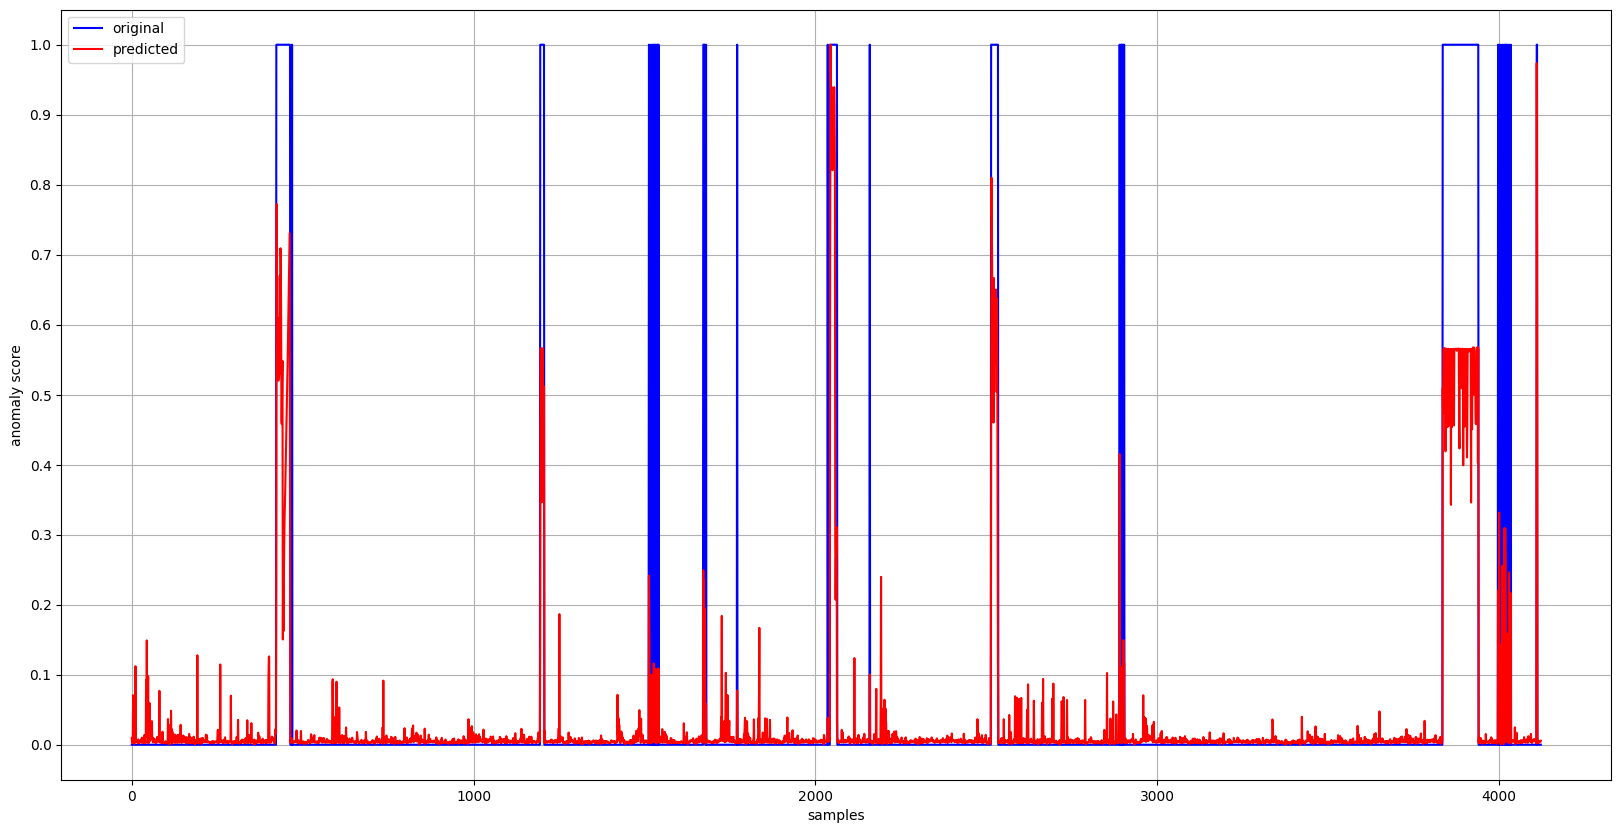

In [51]:
plt.figure(figsize=(20, 10))
plt.plot(test_labels, c='blue', label='original')
plt.plot(anomaly_scores, c='red', label='predicted')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('samples')
plt.ylabel('anomaly score')
plt.grid()
plt.legend()
plt.show()

In [52]:
fpr, tpr, thresholds = roc_curve(test_labels, anomaly_scores)

In [53]:
auc = roc_auc_score(test_labels, anomaly_scores)
print('Area under ROC curve: {}'.format(auc))

Area under ROC curve: 0.9981122271886134


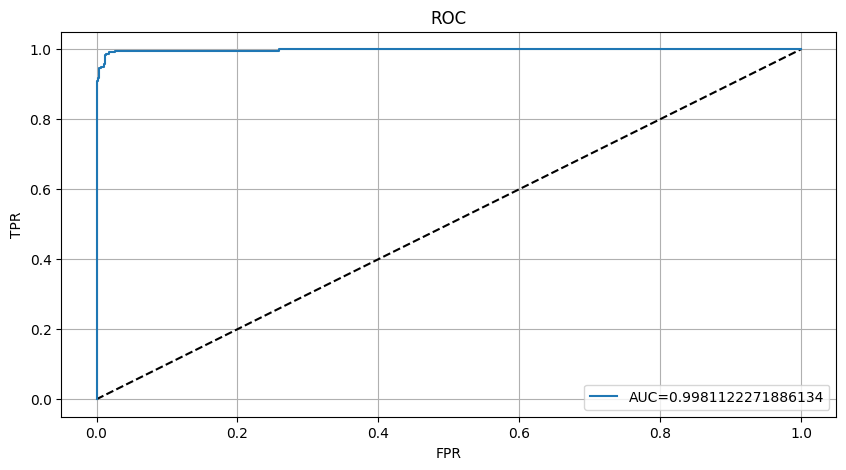

In [55]:
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], color = 'black', linestyle='--')
plt.plot(fpr, tpr, label='AUC={}'.format(auc))
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC')
plt.show()

In [57]:
anomaly_combinations = [(anomaly_scores>i).astype(np.int32) for i in thresholds]
f1_scores = [f1_score(test_labels, i) for i in anomaly_combinations]

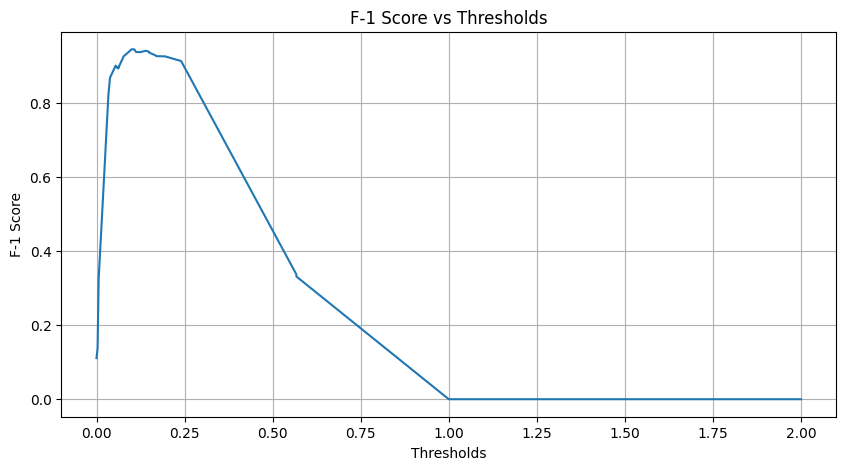

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(thresholds, f1_scores)
plt.grid()
plt.xlabel('Thresholds')
plt.ylabel('F-1 Score')
plt.title('F-1 Score vs Thresholds')
plt.show()

In [59]:
max_f1_score = np.max(f1_scores)
best_threshold = thresholds[f1_scores.index(max_f1_score)]
print('best threshold = {}'.format(best_threshold))

best threshold = 0.10000572353601456


In [61]:
anomaly_indicator = (anomaly_scores>best_threshold).astype(np.int32)

In [62]:
confusion_matrix(test_labels, anomaly_indicator)

array([[3868,   13],
       [  14,  228]])

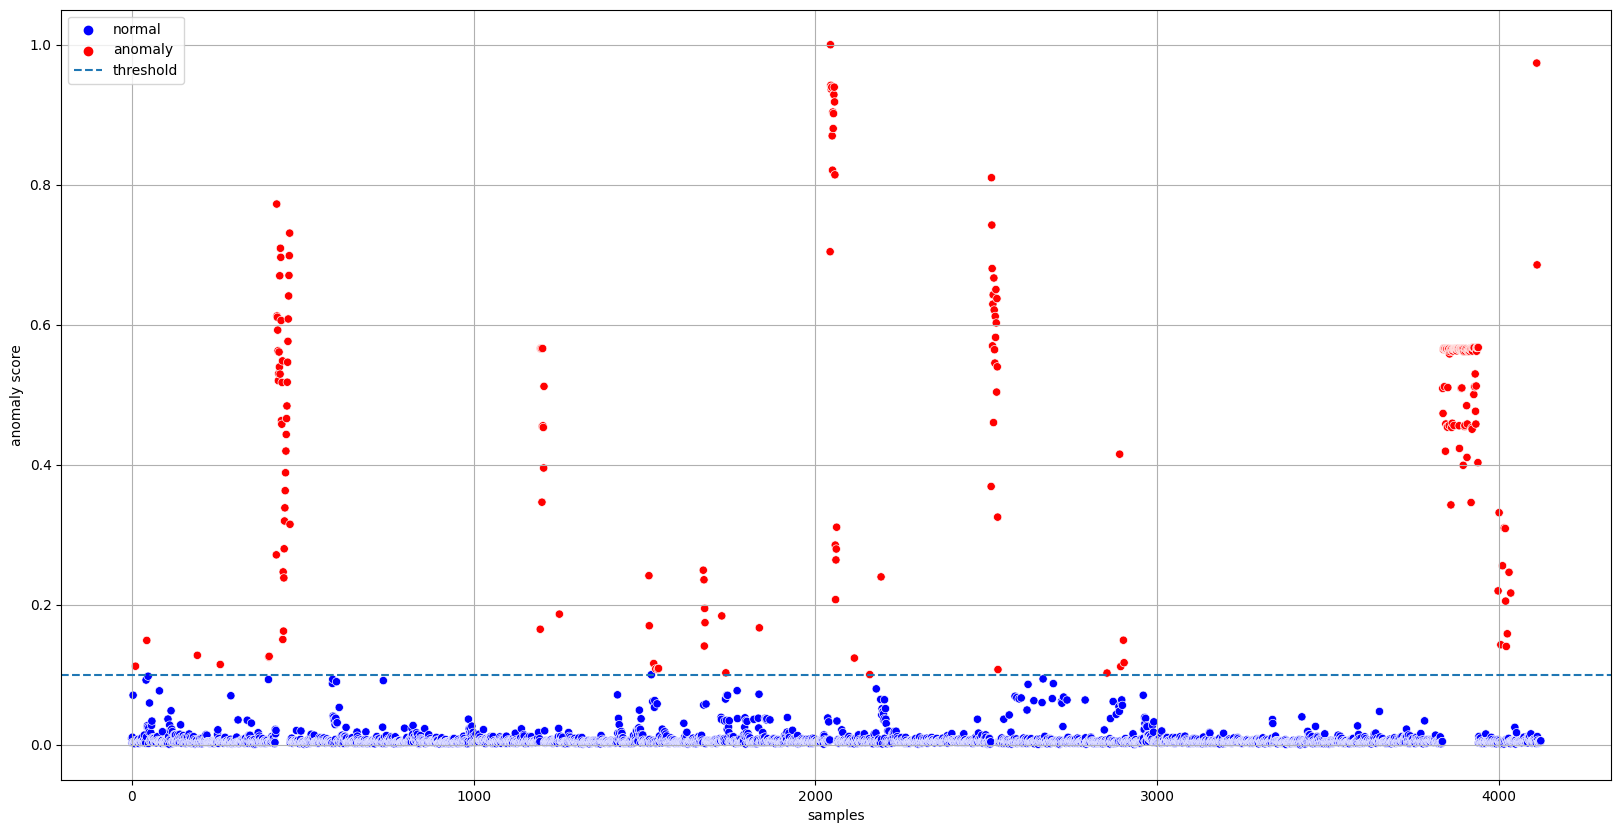

In [64]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=np.arange(0, len(anomaly_scores)), y= anomaly_scores, hue=['normal' if i==0 else 'anomaly' for i in anomaly_indicator],
                palette=['blue', 'red'], legend='full')
plt.axhline(y = best_threshold, linestyle='--', label='threshold')
plt.xlabel('samples')
plt.ylabel('anomaly score')
plt.legend()
plt.grid()
plt.show()

In [66]:
precision = precision_score(test_labels, anomaly_indicator)
recall = recall_score(test_labels, anomaly_indicator)
f1_sc = f1_score(test_labels, anomaly_indicator)
accuracy_sc = accuracy_score(test_labels, anomaly_indicator)

In [67]:
print('Model has the following classification metrics:\n precision = {}\n recall = {}\n f1_score = {}\n accuracy_score = {}'
      .format(precision, recall, f1_sc, accuracy_sc))

Model has the following classification metrics:
 precision = 0.946058091286307
 recall = 0.9421487603305785
 f1_score = 0.9440993788819876
 accuracy_score = 0.9934513703613873


In [68]:
prod_df = pd.read_csv(PROD_DATA_PATH, header=None, names=col_names_cleaned)

In [69]:
# slicing only the rows belonging to http service
prod_df_http = prod_df[prod_df['service']=='http']
prod_df_http.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
8,0,tcp,http,SF,284,765,0,0,0,0,...,251,1.0,0.0,0.01,0.05,0.0,0.0,0.0,0.0,NaN
9,0,tcp,http,SF,304,3634,0,0,0,0,...,251,1.0,0.0,0.01,0.05,0.0,0.0,0.0,0.0,NaN
10,0,tcp,http,SF,286,659,0,0,0,0,...,251,1.0,0.0,0.01,0.05,0.0,0.0,0.0,0.0,NaN
11,0,tcp,http,SF,298,5320,0,0,0,0,...,251,1.0,0.0,0.01,0.05,0.0,0.0,0.0,0.0,NaN
13,0,tcp,http,SF,290,365,0,0,0,0,...,251,1.0,0.0,0.01,0.04,0.0,0.0,0.0,0.0,NaN


In [70]:
prod_df_http.shape

(41192, 42)

In [71]:
# dropping catrgorical columns
prod_df_http.drop(['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login', 'result'], axis=1, inplace=True)
# dropping columns with no std deviation
prod_df_http.drop(['wrong_fragment', 'urgent', 'num_failed_logins', 'su_attempted', 'num_file_creations', 'num_outbound_cmds'], axis=1, inplace=True)

<ipython-input-71-17cb72ea1372>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_df_http.drop(['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login', 'result'], axis=1, inplace=True)
<ipython-input-71-17cb72ea1372>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_df_http.drop(['wrong_fragment', 'urgent', 'num_failed_logins', 'su_attempted', 'num_file_creations', 'num_outbound_cmds'], axis=1, inplace=True)


In [72]:
prod_df_http = pd.DataFrame(scaler.transform(prod_df_http), columns=prod_df_http.columns)

In [73]:
prod_df_http_pca = pd.DataFrame(pca.transform(prod_df_http), columns=pca_cols)
prod_df_http_pca.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13
0,0.297360,-0.032057,-0.121376,-0.526900,0.739751,-0.209450,-0.043693,-0.067645,0.003968,-0.000832,-0.075895,0.074969,0.287922,-0.681393
1,0.710282,-0.230791,-0.290100,0.195176,-0.048202,-0.015575,0.403405,0.035467,0.020562,0.001170,-0.024612,0.163951,0.068895,-0.299118
2,1.039008,-0.440383,-0.462668,0.956009,-0.890064,0.170545,0.816749,-0.016169,0.035937,0.003345,0.016734,0.103992,-0.132922,0.008159
3,1.436586,-0.636894,-0.632507,1.679161,-1.677273,0.367741,1.256743,0.141375,0.052662,0.005434,0.069331,0.243556,-0.353076,0.411528
4,0.632666,-0.155772,-0.143185,-0.132561,0.239163,-0.091299,-0.005238,-0.070818,0.006328,-0.001903,-0.056586,0.057895,0.224589,-0.517693


In [74]:
prod_windows = get_windows(prod_df_http_pca, window_size=10, stride=10)

100%|██████████| 4119/4119 [00:00<00:00, 24503.39it/s]


In [75]:
prod_windows_pred = autoencoder_loaded.predict(prod_windows)

129/129 [==============================] - 2s 12ms/step


In [76]:
prod_recon_errors = get_recon_erros(prod_windows, prod_windows_pred)
prod_recon_errors = np.array(prod_recon_errors).reshape(-1, 1)

In [77]:
mm_scaler_prod = MinMaxScaler()
prod_anomaly_scores = mm_scaler_prod.fit_transform(prod_recon_errors).flatten()

In [78]:
prod_anomaly_indicator = (prod_anomaly_scores>best_threshold).astype(np.int32)

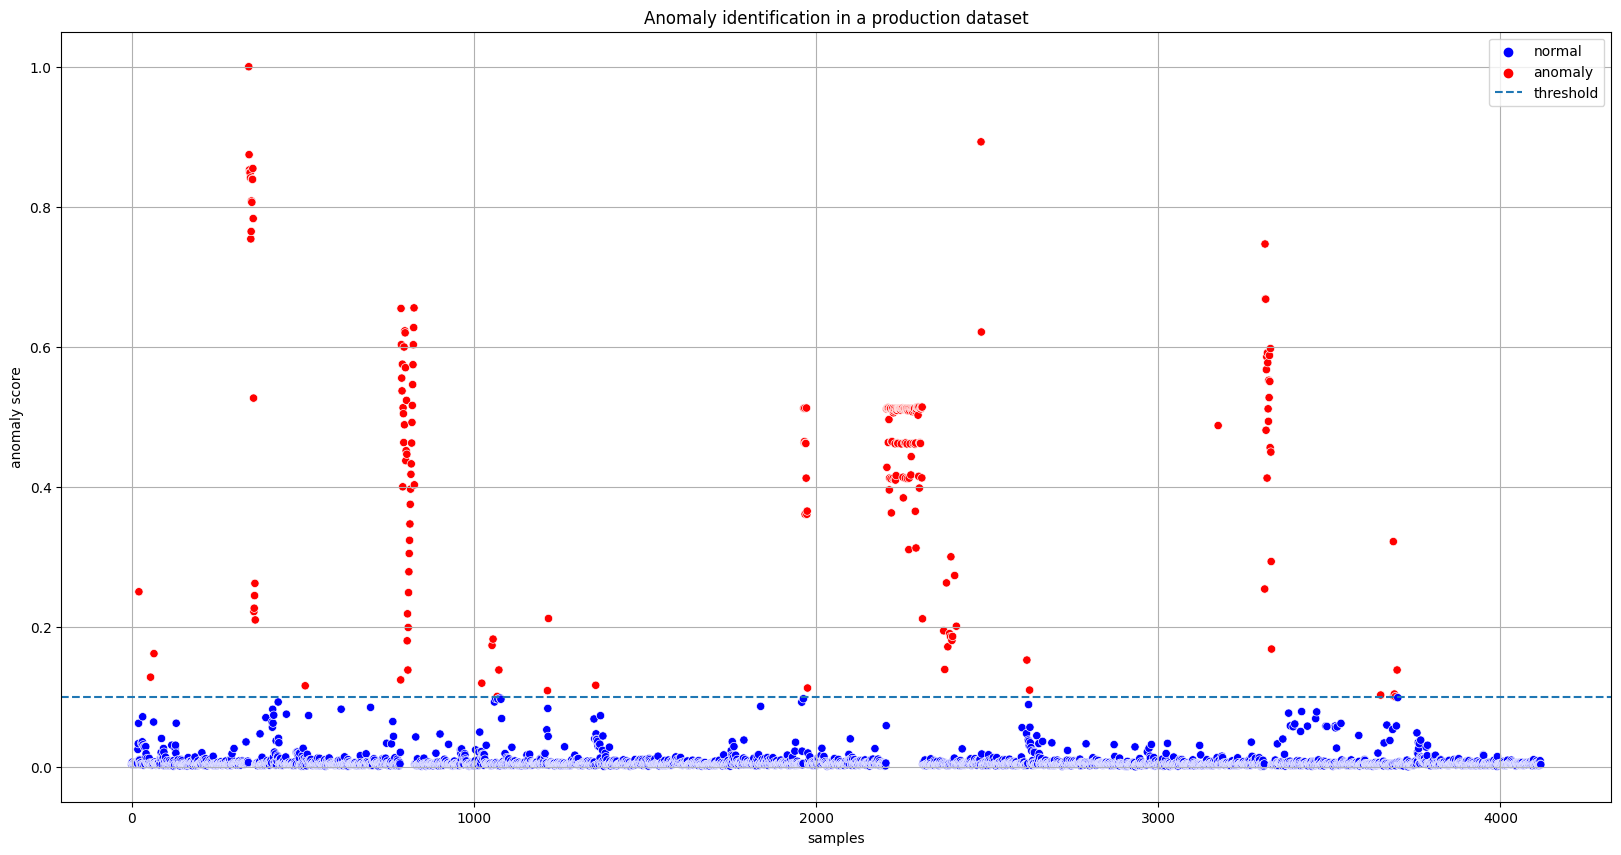

In [79]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=np.arange(0, len(prod_anomaly_scores)), y= prod_anomaly_scores, hue=['normal' if i==0 else 'anomaly' for i in prod_anomaly_indicator],
                palette=['blue', 'red'], legend='full')
plt.axhline(y = best_threshold, linestyle='--', label='threshold')
plt.title('Anomaly identification in a production dataset')
plt.xlabel('samples')
plt.ylabel('anomaly score')
plt.legend()
plt.grid()
plt.show()